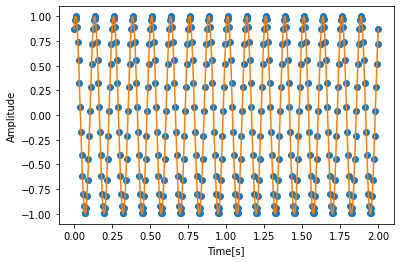

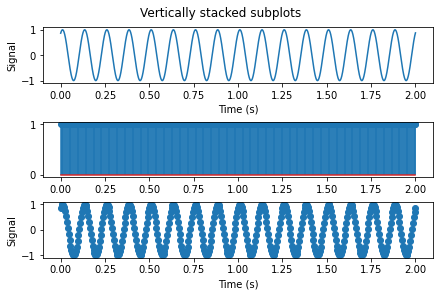

ValueError: A value in x_new is above the interpolation range.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

#define excitation varibales
f_s = 200               # Sample frequency
T_s = 1/f_s             # Sampling time
T = 2                   # Time interval of total test
f_I = 8                 # Identification excitation frequency
phi = np.pi/3           # Signal phase
nCT = 10                # Oversampling points for continuous time plots

NDT=T*f_s               # Number of discrete points
NCT=T*f_s*nCT           # Number of cointinuous point
t_DT= np.arange(0, T+T_s, T_s)              # Discrete-time vector
t_CT= np.arange(0, T+(T_s/nCT), (T_s/nCT))  # Continuous-time vector

def sine (period):
    return np.sin(period)

u_DT=sine(2*np.pi*f_I*t_DT+phi)
u_CT=sine(2*np.pi*f_I*t_CT+phi)

plt.plot(t_DT, u_DT, "o", t_CT, u_CT, "-")
#ax3.suptitle('Continuous signal with sampled points')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.show()

fig2, (ax0, ax1,ax2) = plt.subplots(3, 1, layout='constrained')
fig2.suptitle('Vertically stacked subplots')
ax0.plot(t_CT, u_CT,'-')
ax1.stem(t_DT,np.ones(np.size(t_DT)))
ax2.plot(t_DT,u_DT,'o')

for ax in ax0,ax2:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Signal')

plt.show()

def DAC_0(u_discrete, sample_time, time_range):
    u_test = []
    for i in range(len(time_range)):
        x = int(time_range[i]//sample_time)
        u_test.append(u_discrete[x])
    return np.array(u_test)



# run the function
u_T = DAC_0(u_DT, T_s, t_CT)

# Alternative calculation of u_t, by use of scipy interpolation, kind is 0,2 and all odd numbers
u_interp=interp1d(t_DT,u_DT,kind=1)
u_t_interp = u_interp(t_CT)


plt.plot(t_DT, u_DT, "o", t_CT, u_t_interp, "-")
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.show()

def gamma_dot(t):
    return u_interp(t)

# waarom moet je de waardes voor
# tau_dot=G*gamma_dot(t) -1/lambda *tau
def ODE_maxwell(t, tau, L,G):
    #L,G=args
    return G*gamma_dot(t) - tau/L

sol = solve_ivp(ODE_maxwell, [0, T], [0], args=(1.5, 2.5), t_eval=t_DT)


plt.plot(np.squeeze(t_DT), np.squeeze(sol.y))
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=False)
plt.title('ODE Maxwell')
plt.show()

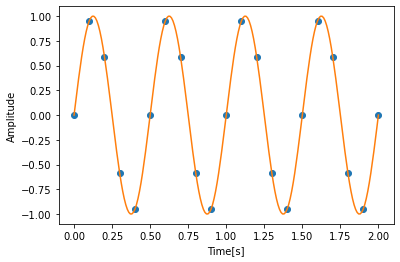

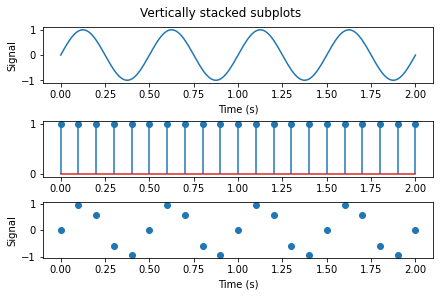

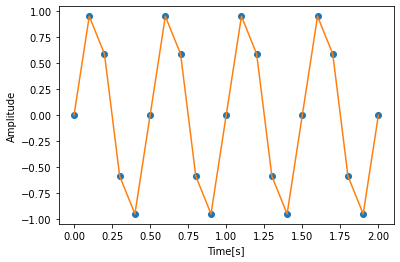

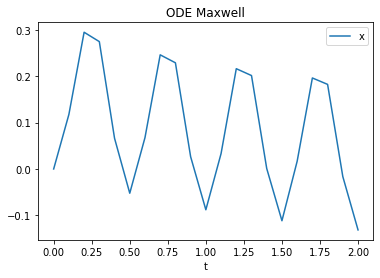

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

#define excitation varibales
f_s = 10               # Sample frequency
T_s = 1/f_s             # Sampling time
T = 2                  # Time interval of total test
f_I = 2                 # Excitation frequency
phi =0            # Signal phase
nCT = 10                # Oversampling points for continuous time plots

NDT=T*f_s               # Number of discrete points
NCT=T*f_s*nCT           # Number of cointinuous point
t_DT= np.arange(0, T+T_s, T_s)              # Discrete-time vector
t_CT= np.arange(0, T+(T_s/nCT), (T_s/nCT))  # Continuous-time vector

def sine (period):
    return np.sin(period)

u_DT=sine(2*np.pi*f_I*t_DT+phi)
u_CT=sine(2*np.pi*f_I*t_CT+phi)

plt.plot(t_DT, u_DT, "o", t_CT, u_CT, "-")
#ax3.suptitle('Continuous signal with sampled points')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.show()

fig2, (ax0, ax1,ax2) = plt.subplots(3, 1, layout='constrained')
fig2.suptitle('Vertically stacked subplots')
ax0.plot(t_CT, u_CT,'-')
ax1.stem(t_DT,np.ones(np.size(t_DT)))
ax2.plot(t_DT,u_DT,'o')

for ax in ax0,ax2:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Signal')

plt.show()

def DAC_0(u_discrete, sample_time, time_range):
    u_test = []
    for i in range(len(time_range)):
        x = int(time_range[i]//sample_time)
        u_test.append(u_discrete[x])
    return np.array(u_test)



# run the function
u_T = DAC_0(u_DT, T_s, t_CT)

# Alternative calculation of u_t, by use of scipy interpolation, kind is 0,2 and all odd numbers
u_interp=interp1d(t_DT,u_DT,kind=1)
u_t_interp = u_interp(t_CT)


plt.plot(t_DT, u_DT, "o", t_CT, u_t_interp, "-")
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.show()

def gamma_dot(t):
    return u_interp(t)

# waarom moet je de waardes voor
# tau_dot=G*gamma_dot(t) -1/lambda *tau
def ODE_maxwell(t, tau, L,G):
    #L,G=args
    return G*gamma_dot(t) - tau/L

sol = solve_ivp(ODE_maxwell, [0, T], [0], args=(1.5, 2.5), t_eval=t_DT)


plt.plot(np.squeeze(t_DT), np.squeeze(sol.y))
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=False)
plt.title('ODE Maxwell')
plt.show()

In [97]:
import math
import sys

def find_lcm(f_0, end_range):
    lcm = f_0
    for i in range(2, end_range + 1):
        lcm = math.lcm(lcm, f_0 * i)
    return lcm

def is_divisible(N, f_0, i):
    # Check if N divided by (f_0 * i) has no remainder
    return N % (f_0 * i) == 0

def recommend_N(f_0, N, end_range):
    recommended_N_larger = N
    recommended_N_smaller = N

    # Search for the closest suitable N in both directions
    while not (any(is_divisible(recommended_N_larger, f_0, i) for i in range(1, end_range + 1)) or any(is_divisible(recommended_N_smaller, f_0, i) for i in range(1, end_range + 1))):
        recommended_N_larger += 1
        recommended_N_smaller -= 1

    # Choose the closest suitable N
    if any(is_divisible(recommended_N_larger, f_0, i) for i in range(1, end_range + 1)) and any(is_divisible(recommended_N_smaller, f_0, i) for i in range(1, end_range + 1)):
        recommended_N = recommended_N_larger if abs(N - recommended_N_larger) < abs(N - recommended_N_smaller) else recommended_N_smaller
    elif any(is_divisible(recommended_N_larger, f_0, i) for i in range(1, end_range + 1)):
        recommended_N = recommended_N_larger
    else:
        recommended_N = recommended_N_smaller

    print(f"The recommended N for divisibility by ({f_0} * i) for i in the range 1 to {end_range} around {N} is {recommended_N}.")

    # Exit the program if N is not divisible by f_0
    if not any(is_divisible(N, f_0, i) for i in range(1, end_range + 1)):
        exit("Selected N is not divisible by f_0.")
    else:
        print(f"No recommendation needed. The selected value of N is already suitable.")

def recommend_N_function(f_0, N, end_range):
    return(recommend_N(f_0, N, end_range))

# Example usage:
f_0 = 10
N = 6005
end_range = 7

# Call the function with your chosen values
recommend_N_function(f_0, N, end_range)



The recommended N for divisibility by (10 * i) for i in the range 1 to 7 around 6005 is 6000.


In [127]:
import rheosys as rhs

f=6
n=2100
end=4

rhs.windowing(f,n,end)



The recommended N for divisibility by (6 * i) for i in the range 1 to 2100 around 4 is 6.


NameError: name 'exit' is not defined